## Import libraries

In [17]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.metrics import confusion_matrix

from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout

## Load Data

In [2]:
train = pd.read_csv('data/sign_mnist_train.csv')
test = pd.read_csv('data/sign_mnist_test.csv')

In [3]:
#Datasets as numpy arrays
train_data = np.array(train, dtype = 'float32')
test_data = np.array(test, dtype='float32')

#Define class labels for easy interpretation
class_names = ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 
               'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y' ]

## Sanity check

Label for the image is:  H


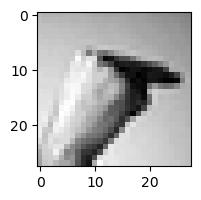

In [4]:
#Sanity check - plot a few images and labels
i = random.randint(1,train.shape[0])
fig1, ax1 = plt.subplots(figsize=(2,2))
plt.imshow(train_data[i,1:].reshape((28,28)), cmap='gray') 
print("Label for the image is: ", class_names[int(train_data[i,0])])

Text(0.5, 1.0, 'Label')

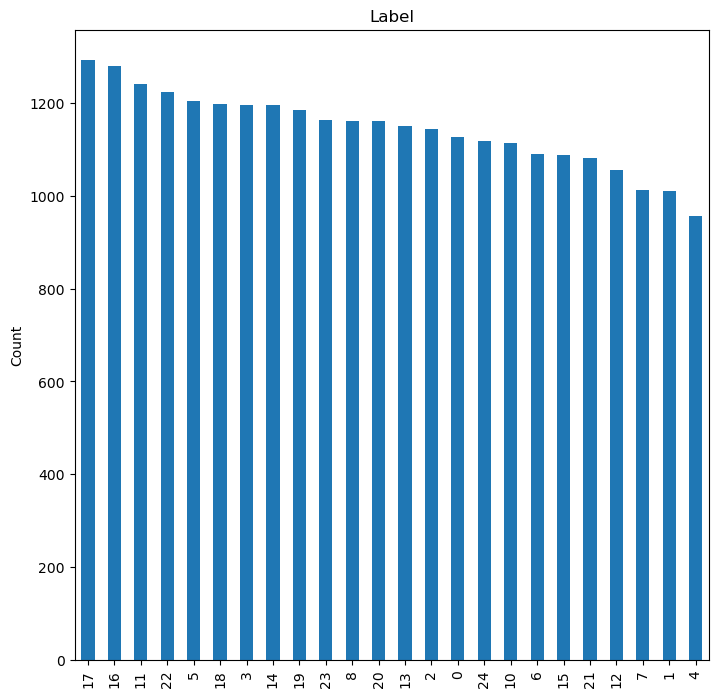

In [5]:
# Data distribution visualization
fig = plt.figure(figsize=(18,18))
ax1 = fig.add_subplot(221)
train['label'].value_counts().plot(kind='bar', ax=ax1)
ax1.set_ylabel('Count')
ax1.set_title('Label')

Dataset seems to be fairly balanced

## Preprocessing Data

In [6]:
#Normalize / scale X values
X_train = train_data[:, 1:] /255.
X_test = test_data[:, 1:] /255.

In [7]:
#Convert y to categorical to use categorical cross entropy
y_train = train_data[:, 0]
y_train_cat = to_categorical(y_train, num_classes=25)

y_test = test_data[:,0]
y_test_cat = to_categorical(y_test, num_classes=25)

#Reshape for the neural network
X_train = X_train.reshape(X_train.shape[0], *(28, 28, 1))
X_test = X_test.reshape(X_test.shape[0], *(28, 28, 1))

## Building Model

In [8]:
#Model
model = Sequential()

model.add(Conv2D(32, (3, 3), input_shape = (28,28,1), activation='relu'))
model.add(MaxPooling2D(pool_size = (2, 2)))
model.add(Dropout(0.2))

model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size = (2, 2)))
model.add(Dropout(0.2))

model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size = (2, 2)))
model.add(Dropout(0.2))

model.add(Flatten())

model.add(Dense(128, activation = 'relu'))
model.add(Dense(25, activation = 'softmax'))

### Optimizing

In [9]:
model.compile(loss ='categorical_crossentropy', optimizer='adam', metrics =['acc'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2  (None, 13, 13, 32)        0         
 D)                                                              
                                                                 
 dropout (Dropout)           (None, 13, 13, 32)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 5, 5, 64)          0         
 g2D)                                                            
                                                                 
 dropout_1 (Dropout)         (None, 5, 5, 64)          0

In [10]:
history = model.fit(X_train, y_train_cat, batch_size = 128, epochs = 10, verbose = 1, validation_data = (X_test, y_test_cat))

Epoch 1/10
215/215 [==============================] - 13s 54ms/step - loss: 2.5015 - acc: 0.2334 - val_loss: 1.3530 - val_acc: 0.5753
Epoch 2/10
215/215 [==============================] - 11s 52ms/step - loss: 1.0218 - acc: 0.6522 - val_loss: 0.7543 - val_acc: 0.7366
Epoch 3/10
215/215 [==============================] - 11s 52ms/step - loss: 0.5700 - acc: 0.8058 - val_loss: 0.4688 - val_acc: 0.8409
Epoch 4/10
215/215 [==============================] - 11s 53ms/step - loss: 0.3634 - acc: 0.8766 - val_loss: 0.3605 - val_acc: 0.8774
Epoch 5/10
215/215 [==============================] - 12s 54ms/step - loss: 0.2472 - acc: 0.9179 - val_loss: 0.3017 - val_acc: 0.9081
Epoch 6/10
215/215 [==============================] - 12s 54ms/step - loss: 0.1780 - acc: 0.9430 - val_loss: 0.2310 - val_acc: 0.9166
Epoch 7/10
215/215 [==============================] - 11s 52ms/step - loss: 0.1368 - acc: 0.9570 - val_loss: 0.2136 - val_acc: 0.9261
Epoch 8/10
215/215 [==============================] - 11s 52ms

## Visualize model performance

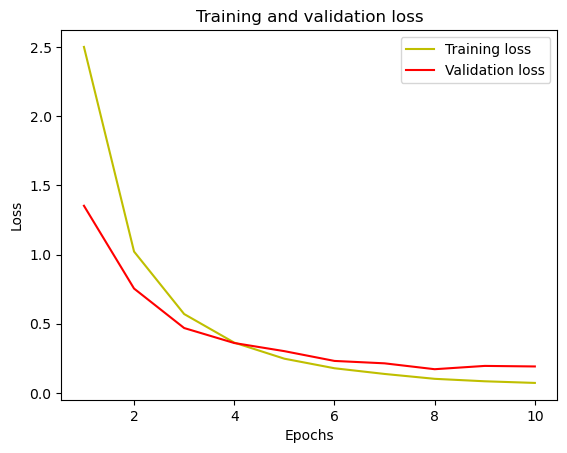

In [11]:
#plot the training and validation accuracy and loss at each epoch
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'y', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [12]:
acc = history.history['acc']
val_acc = history.history['val_acc']

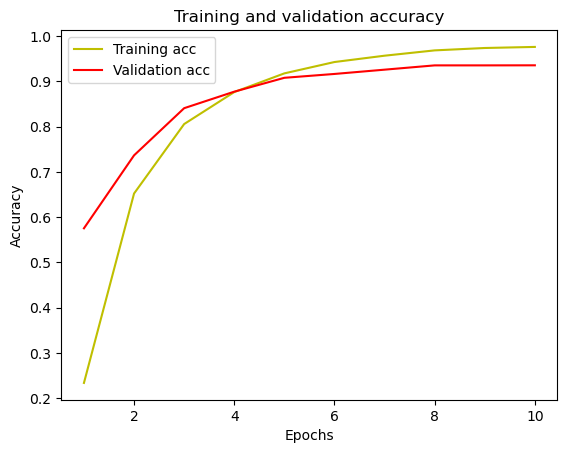

In [13]:
plt.plot(epochs, acc, 'y', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [14]:
prediction = np.argmax(model.predict(X_test), axis=-1)

225/225 [==============================] - 1s 4ms/step


In [15]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, prediction)
print('Accuracy Score = ', accuracy)

Accuracy Score =  0.9357222532069158


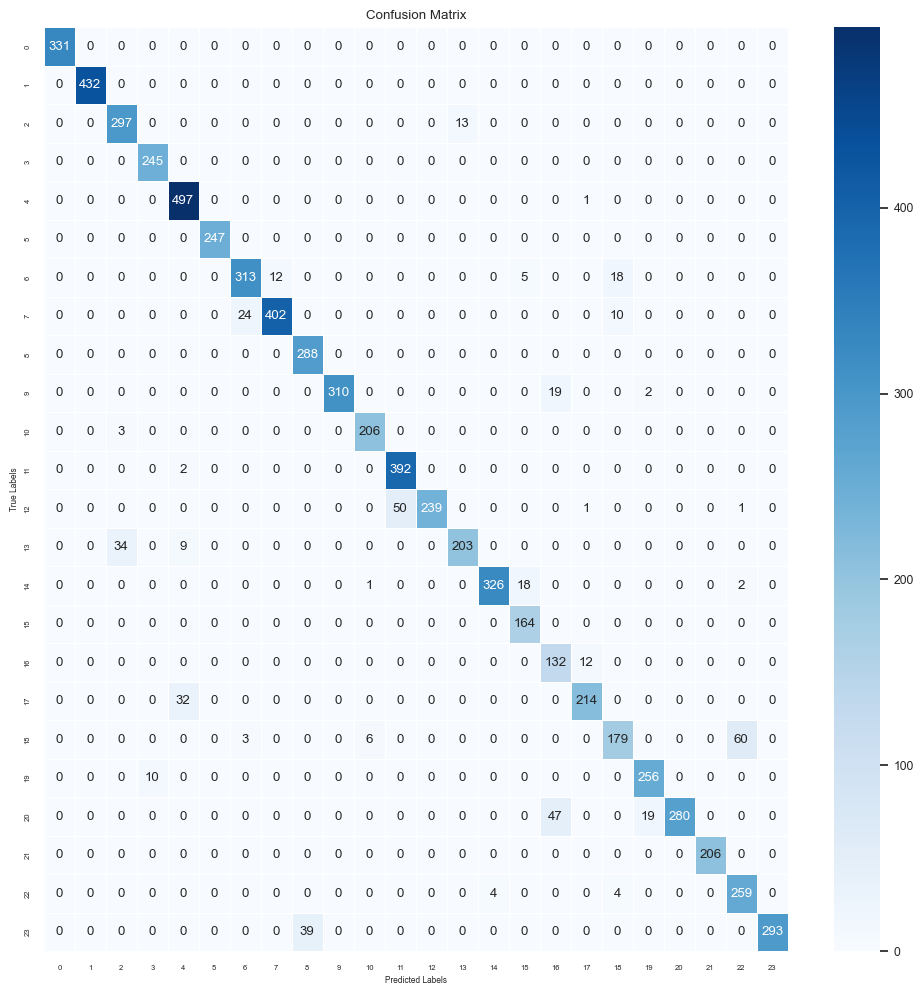

In [22]:
# Assuming y_test and prediction are defined and contain the test labels and predictions
cm = confusion_matrix(y_test, prediction)

# Create a larger figure for better readability
fig, ax = plt.subplots(figsize=(12, 12))
sns.set(font_scale=0.8)
sns.heatmap(cm, annot=True, fmt='d', linewidths=.5, ax=ax, cmap='Blues')
ax.set_xlabel('Predicted Labels')
ax.set_ylabel('True Labels')
ax.set_title('Confusion Matrix')

plt.show()

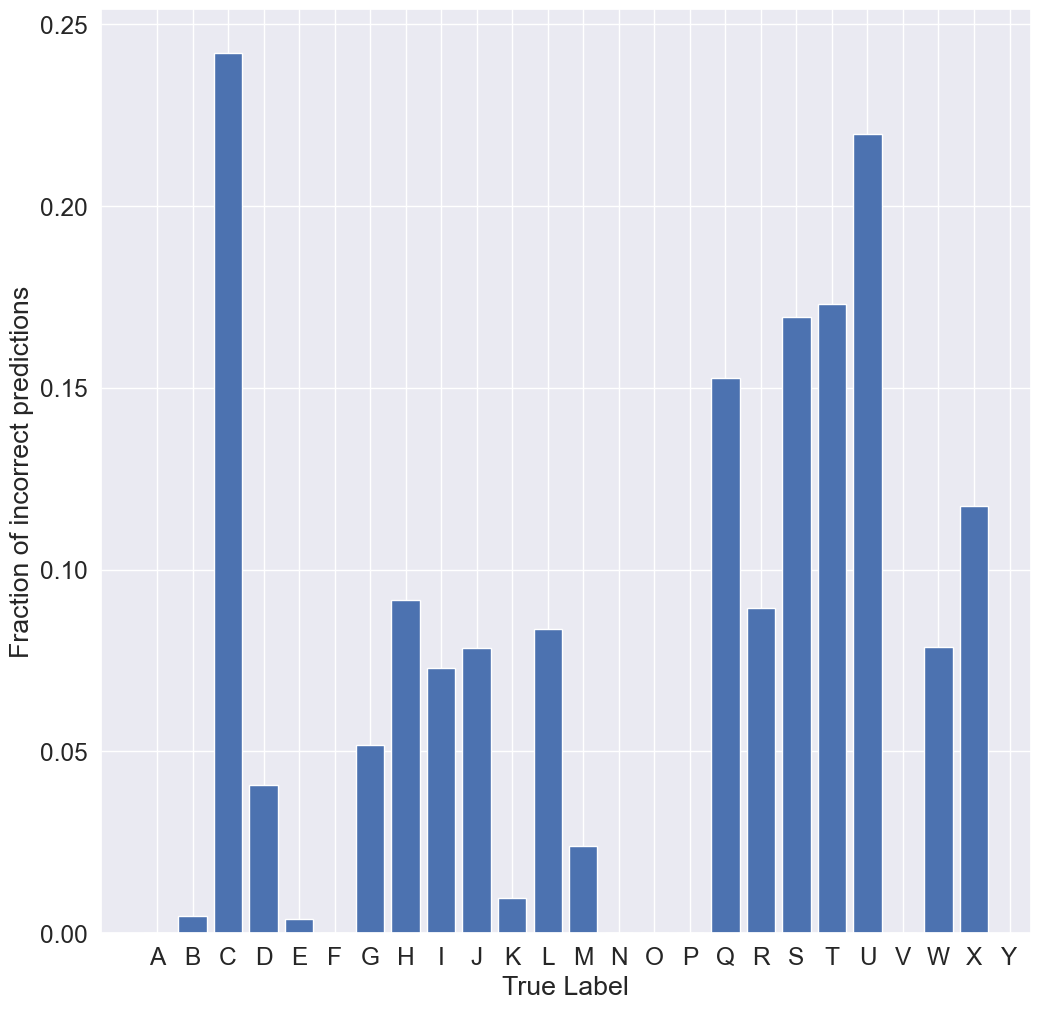

In [29]:
#PLot fractional incorrect misclassifications
incorr_fraction = 1 - np.diag(cm) / np.sum(cm, axis=1)
fig, ax = plt.subplots(figsize=(12,12))
plt.bar(np.arange(24), incorr_fraction)
plt.xlabel('True Label')
plt.ylabel('Fraction of incorrect predictions')
plt.xticks(np.arange(25), class_names)
plt.show()

## Test Prediciton

Predicted Label:  B
True Label:  B


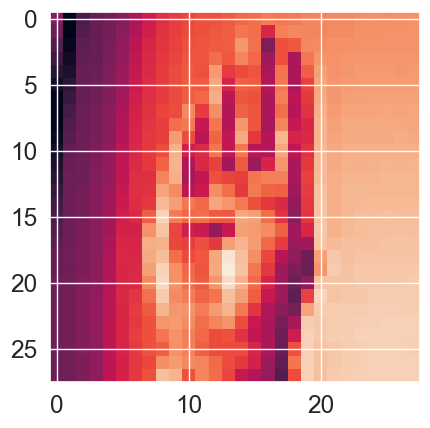

In [36]:
#Test Prediction
i = random.randint(1,len(prediction))
plt.imshow(X_test[i,:,:,0]) 
print("Predicted Label: ", class_names[int(prediction[i])])
print("True Label: ", class_names[int(y_test[i])])